<h1><font color= green> Text Analysis Using NetworkX</font></h1>

<b>Tulasi Ramarao IS620 Week8 Assignment: <br>
Assignment – High Frequency Words <br>
Please answer the following questions in an IPython Notebook, posted to GitHub.<br>
a) Choose a corpus of interest.<br><br>
b) How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).<br>
c)Taking the most common words, how many unique words represent half of the total words in the corpus?<br>
d)Identify the 200 highest frequency words in this corpus.<br>
e)Create a graph that shows the relative frequency of these 200 words.<br>
f)Does the observed relative frequency of these words follow Zipf’s law? Explain.<br>
g)In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”<br><b>

<b>Tulasi Ramarao IS620 Week8 Assignment:  </b>   <br>
a) Corpus of interest chosen: http://time.com/3923128/donald-trump-announcement-speech/
<p>This project will take the presidential bid announcement speech from Donald Trump and will  analyze the plain text file. The project will first convert into a list of 
newline-separated sentences and will compute word frequencies. Meanwhile the program will do lowercasing and will filter out the common words. From the most common words, a weighted graph of word co-occurrences are created and displayed. The graph structure is summarized by Eigenvector centrality ranking.</p>
<br>


In [1]:
%pylab inline
sys.path.append('/Users/tulasiramarao/anaconda/lib/python2.7/site-packages/')
import sys
import re
import unidecode
import string
from unidecode import unidecode
import nltk, re, pprint
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [2]:
# to filter out unwanted chars
def filter_func(char):
    return char == '\n' or 32 <= ord(char) <= 126
# and later:
    filtered_data = filter(filter_func, data).lower()

In [3]:
#default_url  = "https://github.com/tramarao/IS620Week4Project/trumpSpeech.txt"
#n_words = 15
#n_nodes = 15
n_words = 200
n_nodes = 100

#make a copy
#url  = default_url
    

Fetch text and do basic preprocessing.

In [4]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


In [5]:
def To_wordlist( review, remove_stopwords=False ):
    review_text = BeautifulSoup(review).get_text()
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return(words)


def To_sentences( review, tokenizer, remove_stopwords=False ):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append( To_wordlist( raw_sentence,remove_stopwords ))
    return sentences


In [6]:
# Download the punkt tokenizer for sentence splitting
#import nltk.data
#nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


In [7]:
from urllib import urlopen 
url = "http://time.com/3923128/donald-trump-announcement-speech/"
html = urlopen(url).read()
#html[:60]

# Fetch text and do basic preprocessing
#text = get_text_from_url(url).lower()
lines = html.splitlines()

    
sentences = To_sentences(html, tokenizer )
# This is where Trump's speech starts
sentences = sentences[23:200]
#print(sentences)

# This is where Trump's speech starts



Compute frequency histogram.

In [8]:

def word_num(text):
    wordnum = 0
    for word2 in text:
        for word3 in word2:
            wordnum = wordnum + 1
    return wordnum


def text_cleanup(text, min_length=3,
                 remove = set(['for', 'the', 'and', 'with'])):
    a = []
    for w1 in text:
        #print("Inside textcleanup")
        #print(w1)
        for w2 in w1:
            #print(w2)
            #print('length***1=',len(w2))
            if len(w2) >= min_length: 
                #print("HI !!!!" )
                #print(w2)
                if w2 not in remove:
                    #print("HI2222 !!!!" )
                    #print(w2)
                    a.append(w2)
    return a
 

In [9]:

def word_num(text):
    wordnum = 0
    for word2 in text:
        for word3 in word2:
            wordnum = wordnum + 1
    return wordnum

def sort_freqs(freqs):
    items = freqs.items()
    items.sort(key = lambda wc: wc[1])
    return items



In [10]:
#sentences1 = text_cleanup(sentences)
#print("sentences")
#print(sentences)
def word_freq(text):
    freqs = {}
    for word1 in text:
        for word in word1:
            wordspl= word.split()
            freqs[word] = freqs.get(wordspl[0], 0) + 1
    return freqs

wf = word_freq(sentences)


#print(wf)
sorted_wf = sort_freqs(wf)
#print(sorted_wf)

Build a graph from the n_nodes most frequent words.

In [11]:
def all_pairs(items):
    """Make all unique pairs """
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
    wpairs = all_pairs(words)
    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur


def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g



In [12]:
popular = sorted_wf[-n_nodes:]
pop_words = [wc[0] for wc in popular]
#print(pop_words)
#print(lines)
co_occur = co_occurrences(lines, pop_words)
# to plot graph later
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
#centrality = nx.eigenvector_centrality_numpy(wgraph)


Print summaries of single-word frequencies and graph structure.

In [13]:
def summarize_freq_hist(freqs, n=73):
    items = sort_freqs(freqs) if isinstance(freqs, dict) else freqs
    print 'b) How many total unique words are in the corpus? '
    print 'Number of unique words:',len(freqs)
    print
    #print '%d least frequent words:' % n
    #print_vk(items[:n])
    #print
    #print '%d most frequent words:' % n
    #print_vk(items[-n:])
    addup = items[-n:]
    adduptotal = 0
    for item in addup:
        addup = item[1]
        #print 'whats here '
        #print addup
        adduptotal = adduptotal + addup
    print 'Total number of words:', adduptotal
    print 'c) Total number of Frequent words used to make it add up close to 50% of total words:', n
  


In [14]:
def summarize_centrality(centrality):
    c = centrality.items()
    c.sort(key=lambda x:x[1], reverse=True)
    print '\nGraph centrality'
    for node, cent in c:
        print "%15s: %.3g" % (node, cent)


In [15]:
def text_cleanup(text, min_length=3,
                 remove = set(['for', 'the', 'and', 'with'])):
    a = []
    for w1 in text:
        #print("Inside textcleanup")
        #print(w1)
        for w2 in w1:
            #print(w2)
            #print('length***1=',len(w2))
            if len(w2) >= min_length: 
                #print("HI !!!!" )
                #print(w2)
                if w2 not in remove:
                    #print("HI2222 !!!!" )
                    #print(w2)
                    a.append(w2)
    return a
 

In [16]:
summarize_freq_hist(sorted_wf)
totalWords = word_num(sentences)
wor = text_cleanup(sentences)
#print("wor=") 
#print(wor)
print ''
print 'Total number of words Now:', totalWords



b) How many total unique words are in the corpus? 
Number of unique words: 500

Total number of words: 1402
c) Total number of Frequent words used to make it add up close to 50% of total words: 73

Total number of words Now: 2206


In [17]:
#print(sorted_wf)
#print(wf)

In [18]:
def word_frequ(text):
    freqs = {}
    for word1 in text:
        wordspl= word1.split()
        freqs[word1] = freqs.get(wordspl[0], 0) + 1
    return freqs

wf = word_frequ(wor)

#print(wf)
# sort in reverse order
def sort_freqs(freqs):
    items = freqs.items()
    items.sort(key = lambda wc: wc[1],reverse=True)
    return items


sorted_wrdf = sort_freqs(wf)
print("d) 200 highest frequency words in this corpus* \n")
print(sorted_wrdf[:200])




d) 200 highest frequency words in this corpus* 

[(u'they', 76), (u'have', 43), (u'that', 40), (u'you', 33), (u'our', 27), (u'are', 22), (u'don', 21), (u'can', 19), (u'people', 18), (u'great', 15), (u'but', 15), (u'going', 14), (u'was', 14), (u'all', 13), (u'because', 13), (u'what', 12), (u'not', 12), (u'need', 12), (u'jobs', 12), (u'country', 12), (u'know', 12), (u'from', 11), (u'this', 11), (u'them', 11), (u'will', 11), (u'when', 10), (u'now', 9), (u'over', 8), (u'happen', 8), (u'bring', 8), (u'has', 8), (u'time', 8), (u'even', 7), (u'iraq', 7), (u'tell', 7), (u'think', 7), (u'china', 7), (u'make', 7), (u'back', 7), (u'right', 7), (u'love', 6), (u'would', 6), (u'more', 6), (u'how', 6), (u'really', 6), (u'believe', 6), (u'say', 6), (u'take', 6), (u'get', 6), (u'said', 6), (u'like', 6), (u'there', 6), (u'again', 6), (u'obamacare', 5), (u'leader', 5), (u'iran', 5), (u'sending', 5), (u'cheerleader', 5), (u'work', 5), (u'good', 5), (u'somebody', 5), (u'their', 5), (u'than', 5), (u'anybody

In [19]:
def Most_freqwords(freqs, n=200):
    items = sort_freqs(freqs) if isinstance(freqs, dict) else freqs
    #print_vk(items[:n])
    print
    print '%d most frequent words:' % n
    print_vk(items[-n:])
    #items=items.sort(reverse=True)
    return items

#mostFreqWords = sorted_wrdf[0:200]
#print(mostFreqWords)
#mostFreqWords = Most_freqwords(sorted_wrdf,200)
#print(mostFreqWords)
#summarize_centrality(centrality)

Plot histogram and graph.

In [20]:
def plot_word_histogram(freqs, show=10, title=None):
    sorted_f = sort_freqs(freqs) if isinstance(freqs, dict) else freqs
    #print(sorted_f)
    if isinstance(show, int):
        show_f = sorted_f[-show:]
    else:
        start = -int(round(show*len(freqs)))
        show_f = sorted_f[start:]

    n_words = len(show_f)
    ind = np.arange(n_words)
    words = [i[0] for i in show_f]
    counts = [i[1] for i in show_f]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.step(ind, counts)

    if float(max(counts))/min(counts) > 100:
        ax.set_yscale('log')

    if title:
        ax.set_title(title)
    return ax



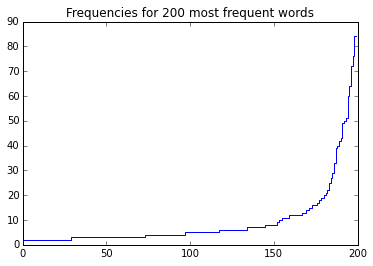

In [21]:
n_words = 200 # most frequent top 200 words
# g)  Graph showing relative frequencies of 200 words
plot_word_histogram(sorted_wf, n_words,"Frequencies for %s most frequent words" % n_words)

g) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” <br>
The plots below shows the frequency of all words. These two plots are very similar.

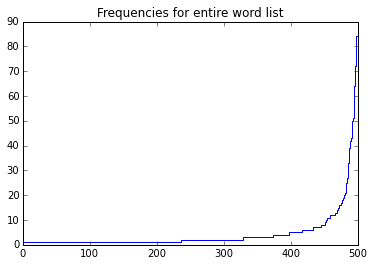

In [22]:
plot_word_histogram(sorted_wf, 1.0, "Frequencies for entire word list")


wikipedia.org -> Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. For example, in the Brown Corpus of American English text, the word "the" is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word "of" accounts for slightly over 3.5% of words (36,411 occurrences), followed by "and" (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.[4]

According to Zipfs law 1.27 should be close to 1.
And it is. So this frequency of this corpus follows zipfs law


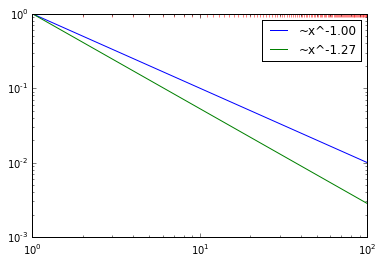

In [23]:


def powerLaw(y, x):
    """
    'When the frequency of an word varies as power of some attribute of that
    word, the frequency is said to follow a power law.' (wikipedia)"
    """
    c = 0
    alpha = .0

    if len(y) and len(y)==len(x):
        c = max(y)
        xmin = float(min(x))
        alpha = 1 + len(x) * pow(sum(np.log(x/xmin)),-1)

    return (c, alpha)


import matplotlib.pyplot as plt

def plotPowerLaws(y, x, c=[], alpha=[]):
    """
    Plots the relationship between x and y and a fitted power law on LogLog scale.
    Args
    """
    plt.figure()
    plt.loglog()
    plt.plot(x,y,'r+')
    for _c, _alpha in zip(c,alpha):
        plt.plot( (1, max(x)),(_c, _c * pow(max(x), _alpha)),label='~x^%.2f' % _alpha)
        plt.legend()
    plt.show()



if __name__ == '__main__':
    """
    Checking Zipfs law, where the frequency and rank of a word follow a
    specific power law, using the nltk genesis text in english.
    """
    from collections import defaultdict
    import numpy as np
    from nltk.corpus import genesis
    #words = genesis.raw('english-web.txt').split(' ')
    #print(pop_words)
    y = defaultdict(int)
    for i in pop_words:
        y[i]+=1
    y = sorted(y.values(),reverse=True)
    x = np.array(xrange(1,len(y)+1))

    c, alpha = powerLaw(y, x)
    print("According to Zipfs law %.2f should be close to 1." % alpha)
    print("And it is. So this frequency of this corpus follows zipfs law")
    
    plotPowerLaws(y, x, [c,c], [-1,-alpha])